In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## PREPROCESSING OF DATA

### Training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 17572 files belonging to 38 classes.


## BUILDING MODEL

##### This is used for capturing important features from an image
#### Importing libraries

In [4]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

#### Tensorflow sequential model

In [24]:
model=tf.keras.Sequential()

#### Building convolution layer

##### The first layer of convolution needs input_shape but the further ones dont and another layer for pooling
##### Different layers are passed

In [25]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Dropout(0.25))  #To avoid overfitting

In [31]:
model.add(Flatten())

##### After flattening we get the dense layer (hidden) which is not seen where units is how many neurons are needed

In [32]:
model.add(Dense(units=1500,activation='relu'))

In [33]:
model.add(Dropout(0.4))

##### Then comes output layer where the neurons are no.of classes and it will give the probability of each class
##### From this we select the class which has max probability and give the output for that disease
##### softmax activation gives the prediction for each class

In [34]:
model.add(Dense(units=38,activation='softmax'))

## COMPILING MODEL

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## MODEL TRAINING

In [37]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3658s 2s/step - accuracy: 0.3957 - loss: 2.1337 - val_accuracy: 0.8335 - val_loss: 0.5105
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3321s 2s/step - accuracy: 0.8378 - loss: 0.5134 - val_accuracy: 0.9046 - val_loss: 0.2927
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3172s 1s/step - accuracy: 0.9040 - loss: 0.2928 - val_accuracy: 0.9302 - val_loss: 0.2202
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3152s 1s/step - accuracy: 0.9338 - loss: 0.2013 - val_accuracy: 0.9328 - val_loss: 0.2165
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3068s 1s/step - accuracy: 0.9515 - loss: 0.1468 - val_accuracy: 0.9581 - val_loss: 0.1353
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2387s 1s/step - accuracy: 0.9638 - loss: 0.1141 - val_accuracy: 0.9418 - val_loss: 0.1824
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2231s 1s/step - accuracy: 0.9685 - loss: 0.0979 - val_accuracy: 0.9576 - val_loss: 0.1381
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2237s 1s/step - accuracy: 0.9735 -

## MODEL EVALUATION

In [38]:
#On training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 908s 413ms/step - accuracy: 0.9808 - loss: 0.0577


In [39]:
print(train_loss,train_acc)

0.05477084219455719 0.9820186495780945


In [40]:
#On validation set
valid_loss,valid_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 229s 411ms/step - accuracy: 0.9537 - loss: 0.1616


In [41]:
print(valid_loss,valid_acc)

0.16379337012767792 0.9541884660720825


## Saving model

In [43]:
model.save("trained_model.keras")

##### The loss and accuracy for all the 10 epochs

In [44]:
training_history.history

{'accuracy': [0.597823441028595,
  0.8590511679649353,
  0.9127249717712402,
  0.9393840432167053,
  0.9537947177886963,
  0.9643502235412598,
  0.97134929895401,
  0.9748203754425049,
  0.978888988494873,
  0.980766773223877],
 'loss': [1.359000563621521,
  0.44484955072402954,
  0.2681652307510376,
  0.18289217352867126,
  0.14056304097175598,
  0.11053615808486938,
  0.08883967995643616,
  0.07733507454395294,
  0.06440234929323196,
  0.0585976168513298],
 'val_accuracy': [0.8334850668907166,
  0.9045640826225281,
  0.9301729798316956,
  0.9327908158302307,
  0.9580582976341248,
  0.9417823553085327,
  0.9576029777526855,
  0.9609606266021729,
  0.9408718347549438,
  0.9541884660720825],
 'val_loss': [0.5105295777320862,
  0.292695015668869,
  0.22019058465957642,
  0.21653468906879425,
  0.13526055216789246,
  0.18237240612506866,
  0.138097882270813,
  0.12698620557785034,
  0.21834415197372437,
  0.1638183295726776]}

#### Keeping the history in json format

In [45]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## ACCURACY VISUALIZATION

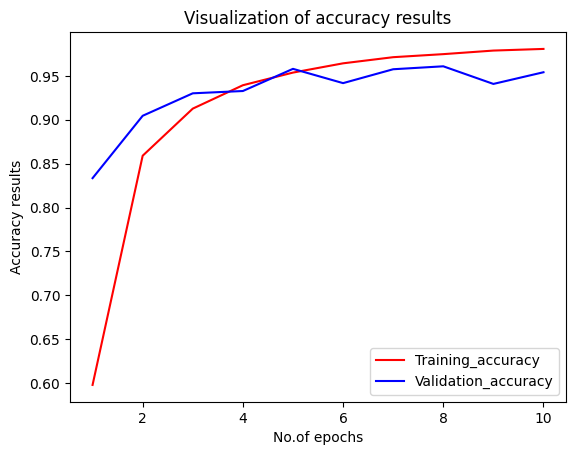

In [51]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation_accuracy')
plt.xlabel("No.of epochs")
plt.ylabel("Accuracy results")
plt.title("Visualization of accuracy results")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [52]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [68]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)

Found 17572 files belonging to 38 classes.


In [69]:
y_pred=model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 212s 385ms/step


array([[9.9888152e-01, 7.4940268e-04, 2.4931438e-07, ..., 6.4582137e-12,
        2.1474672e-10, 1.8564443e-10],
       [9.9928242e-01, 1.8467807e-05, 1.4808255e-07, ..., 1.8508904e-11,
        1.1254223e-10, 1.9171226e-10],
       [1.9402765e-01, 1.9979736e-06, 2.6850299e-07, ..., 5.9573420e-14,
        1.0771039e-11, 2.6805536e-10],
       ...,
       [1.5568154e-11, 3.9485969e-14, 1.3192062e-09, ..., 1.7146599e-12,
        1.6654640e-14, 1.0000000e+00],
       [9.2668408e-11, 1.0710969e-12, 1.1600156e-08, ..., 5.6126930e-12,
        6.1288821e-13, 1.0000000e+00],
       [3.8112814e-18, 3.3582007e-18, 4.3632141e-16, ..., 2.8866981e-20,
        8.4859068e-19, 1.0000000e+00]], dtype=float32)

In [71]:
#find the maximum prediction in column wise manner
predicted_categories=tf.argmax(y_pred,axis=1)

In [72]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [73]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.80      0.89       504
                                 Apple___Black_rot       0.97      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.91      0.99      0.95       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.97      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

In [76]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[403,   9,   8, ...,   0,   0,   0],
       [  0, 484,   2, ...,   0,   0,   0],
       [  0,   0, 434, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 408,   0],
       [  0,   0,   1, ...,   0,   0, 475]], dtype=int64)

## CONFUSION MATRIX VISUALIZATION

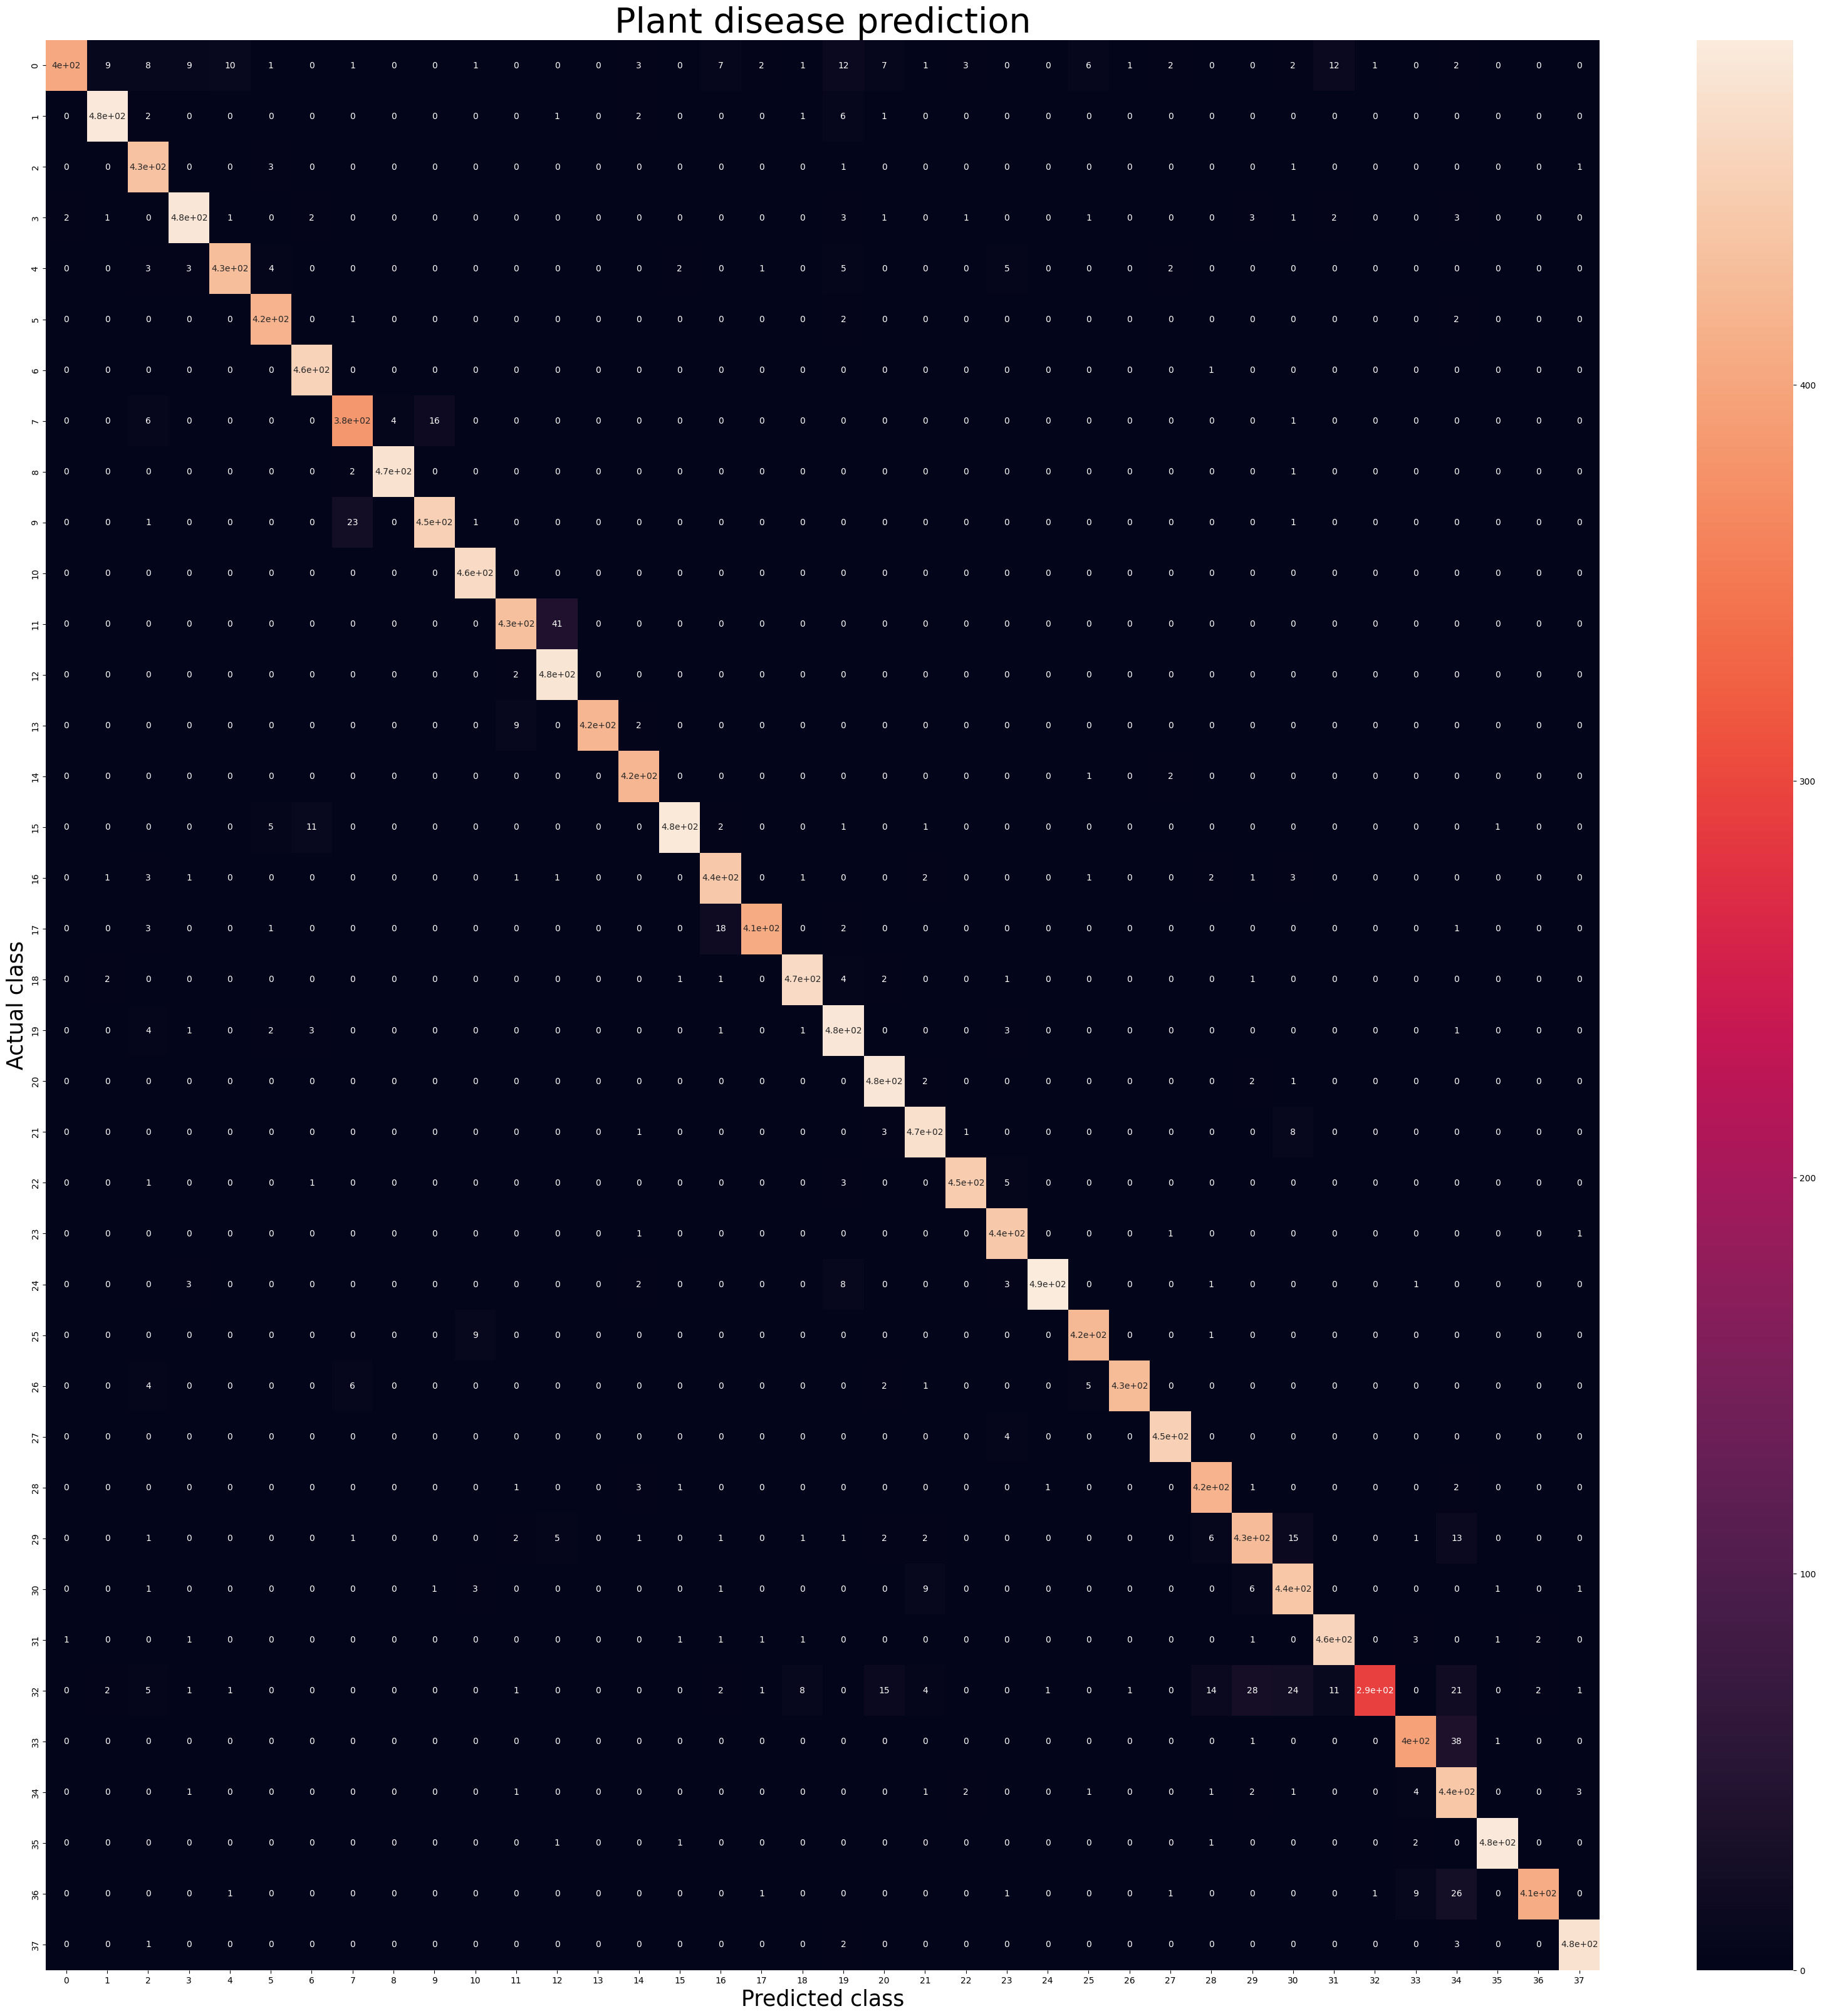

In [84]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=25)
plt.ylabel("Actual class",fontsize=25)
plt.title("Plant disease prediction",fontsize=40)
plt.show()